In [2]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [3]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [4]:
finder(jjii,49.303153019596145, -123.78651388330361)

(500, 246)

In [5]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

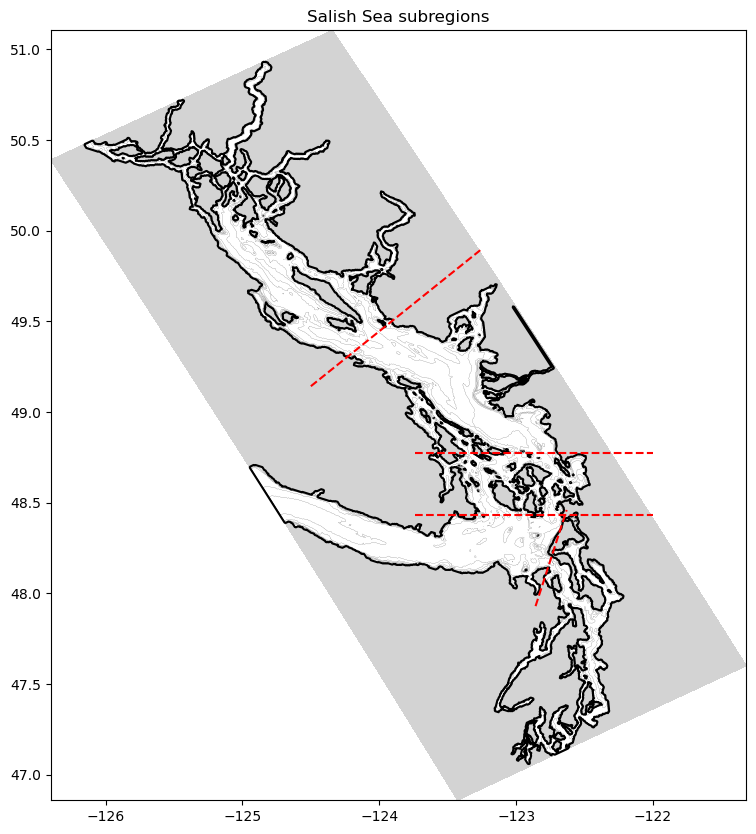

In [6]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [7]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,6e4])
    twin3.set_ylim([-1e4,6e4])
    beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
    sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
    beached = np.array(beached)
    for i,b in enumerate(beached):
        if b==0:
            beached[i]=(beached[i-1]+beached[i+1])/2
    sediment = np.array(sediment)
    for i,b in enumerate(sediment):
        if b==0:
            sediment[i]=(sediment[i-1]+sediment[i+1])/2
    axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
    axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:],10),label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [8]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')
Source = Source.rename(columns={'Lat': 'lat', 'Lon': 'lon'})

In [9]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123.456) & (data['lon']<-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [10]:
area = mask.e1t*mask.e2t
puget_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_area= area.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_area = area.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_area = area.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + area.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_area={'Puget':puget_area,'JdF':jdf_area,'Haro2':haro2_area,'NSoG':NSoG_area,'CSSoG':CSSog_area}


In [11]:
puget_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_vol= mask.volume.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_vol = mask.volume.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_vol = mask.volume.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + mask.volume.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_vol={'Puget':puget_vol,'JdF':jdf_vol,'Haro2':haro2_vol,'NSoG':NSoG_vol,'CSSoG':CSSog_vol}

In [12]:
volume = (mask.e1t[0,:,:]*(mask.e2t[0,:,:])*(mask.e3t_0[0,:,:,:]))
maskt = mask.tmask[0,:,:,:]
total_volume = np.sum(maskt* volume)

In [13]:
# means = []
# count = []
# for alpha in runs:
#     ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
#     x = np.linspace(0,31,ds.dims['obs']-1)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     DS = DS[DS.status==1]
#     times= np.max(DS.time)
#     count.append(len(DS[DS.time == times])*1e7/(total_volume.item()*runs[alpha][1]))
# np.save('count.npy',np.array(count))
count = np.load('count.npy')

/tmp/ipykernel_2445743/519602711.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * x) + b


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

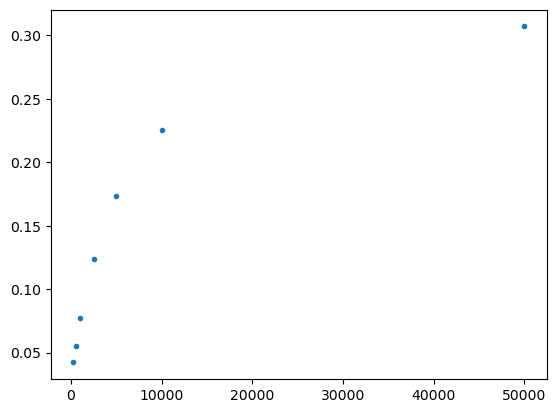

In [14]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}
x = np.array(list(alphs.values()))
plt.plot(x,count,'.')

# Fit a polynomial of degree 1 (a linear function) to the data
xs = x 
ys = count
import scipy.optimize
def monoExp(x, m, t, b):
    return m * np.exp(t * x) + b
# perform the fit
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys)
m, t, b = params

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

xs2 = np.arange(250,5.4e4)
ys2 = monoExp(xs2, m, t, b)

plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title(r'Mean concentration in SalishSeaCast after 30 days run for different $\alpha$')

R² = 0.986193620267178


/tmp/ipykernel_2425872/667298103.py:26: RuntimeWarning: invalid value encountered in log
  return m * np.log(t * x) + b


Text(0.5, 1.0, 'Mean concentration in SalishSeaCast after 30 days run for different $\\alpha$')

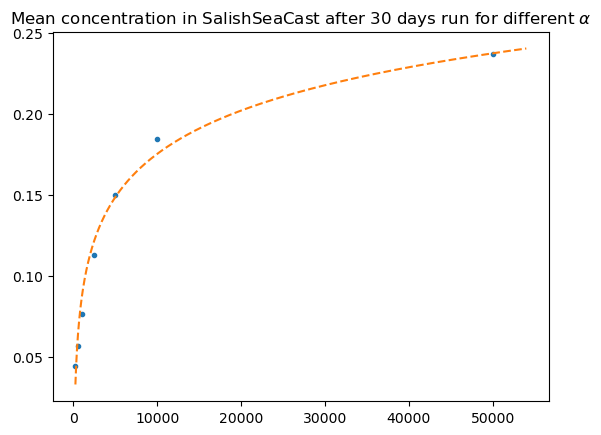

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}
masktt=maskt[:,::3,::3]
conc_mean = []
weighted_nanmean =[]
weighted_q1 = []
weighted_q3 = []
conc_sd = []
weights = mask.e3t_0[0,:,::3,::3]
TD = np.nansum(np.where(masktt,weights,np.nan).ravel())
weights = np.where(masktt,weights,np.nan)/TD
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    conc = np.where(masktt,conc,np.nan)
    masknan = ~np.isnan(conc)
    data_cleaned = conc[masknan]
    weights_cleaned = weights[masknan]
    weighted_mean=np.average(data_cleaned, weights=weights_cleaned)
    weighted_nanmean.append(weighted_mean)
    #conc_mean.append(np.nanmean(np.nanmean(np.nanmean(conc,axis=2),axis=1)))
    #conc_sd.append(np.nanstd(np.nanstd(np.nanstd(conc,axis=2),axis=1)))
#plt.plot(xs, weighted_nanmean, '.', label="data")

ys = weighted_nanmean
import scipy.optimize
def monoExp(x, m, t, b):
    return m * np.log(t * x) + b
# perform the fit
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys)
m, t, b = params

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

xs2 = np.arange(250,5.4e4)
ys2 = monoExp(xs2, m, t, b)
fig, ax = plt.subplots()
plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title(r'Mean concentration in SalishSeaCast after 30 days run for different $\alpha$')

(-0.2, 0.4)

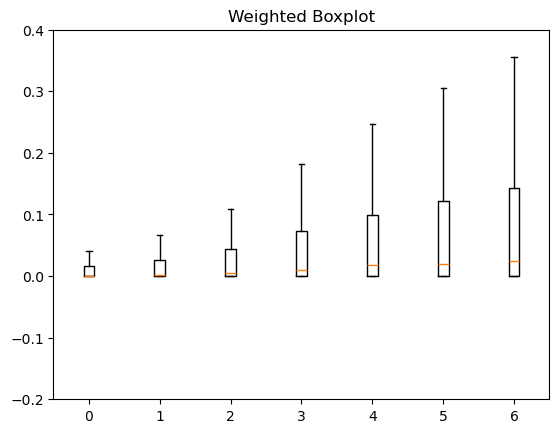

In [ ]:
# Example data and weights
weights = mask.e3t_0[0,:,::3,::3]
TD = np.nansum(np.where(masktt,weights,np.nan).ravel())
weights = np.where(masktt,weights,np.nan)/TD
conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
xs = np.arange(7)
def boxplot(conc,i):
    conc = np.where(masktt,conc,np.nan)
    masknan = ~np.isnan(conc)
    data = conc[masknan]
    weights_cleaned = weights[masknan]

    # Function to compute weighted percentiles
    def weighted_percentile(data, weights, percentiles):
        q3 = np.percentile(data,q=75,weights = weights,method='inverted_cdf')
        q1 = np.percentile(data,q=25,weights = weights,method='inverted_cdf')
        median = np.percentile(data,q=50,weights = weights,method='inverted_cdf')
        return q1,median,q3

    # Compute weighted statistics
    q1, median, q3 = weighted_percentile(data, weights_cleaned, [0.25, 0.5, 0.75])
    iqr = q3 - q1
    lower_whisker = max(data[data >= q1 - 1.5 * iqr].min(), data.min())
    upper_whisker = min(data[data <= q3 + 1.5 * iqr].max(), data.max())
    outliers = data[(data < lower_whisker) | (data > upper_whisker)]

    # Plot the weighted boxplot manually
    ax.bxp([{
        'med': median,
        'q1': q1,
        'q3': q3,
        'whislo': lower_whisker,
        'whishi': upper_whisker,
        'fliers': outliers
    }], showfliers=False,positions=[xs[i]])
    ax.set_title("Weighted Boxplot")

fig, ax = plt.subplots()
for i,alp in enumerate(alphs):
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    boxplot(conc,i)
plt.ylim(-0.2,0.4)

/tmp/ipykernel_2425872/1939540262.py:27: RuntimeWarning: invalid value encountered in log
  return m * np.log(t * x) + b


R² = 0.986193620267178


(-1000.0, 54000.0)

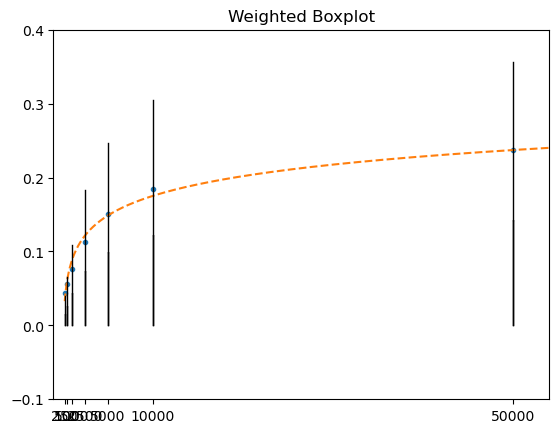

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}
masktt=maskt[:,::3,::3]
xs = x 
conc_mean = []
weighted_nanmean =[]
weighted_q1 = []
weighted_q3 = []
conc_sd = []
weights = mask.e3t_0[0,:,::3,::3]
TD = np.nansum(np.where(masktt,weights,np.nan).ravel())
weights = np.where(masktt,weights,np.nan)/TD
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    conc = np.where(masktt,conc,np.nan)
    masknan = ~np.isnan(conc)
    data_cleaned = conc[masknan]
    weights_cleaned = weights[masknan]
    weighted_mean=np.average(data_cleaned, weights=weights_cleaned)
    weighted_nanmean.append(weighted_mean)
    #conc_mean.append(np.nanmean(np.nanmean(np.nanmean(conc,axis=2),axis=1)))
    #conc_sd.append(np.nanstd(np.nanstd(np.nanstd(conc,axis=2),axis=1)))
#plt.plot(xs, weighted_nanmean, '.', label="data")

ys = weighted_nanmean
import scipy.optimize
def monoExp(x, m, t, b):
    return m * np.log(t * x) + b
# perform the fit
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys)
m, t, b = params

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

xs2 = np.arange(250,5.4e4)
ys2 = monoExp(xs2, m, t, b)
fig, ax = plt.subplots()
plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title(r'Mean concentration in SalishSeaCast after 30 days run for different $\alpha$')
for i,alp in enumerate(alphs):
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    boxplot(conc,i)
plt.ylim(-0.1,0.4)
plt.xlim(-1000,5.4e4)

Text(0.5, 1.0, 'effect of alpha in a single box of the SoG')

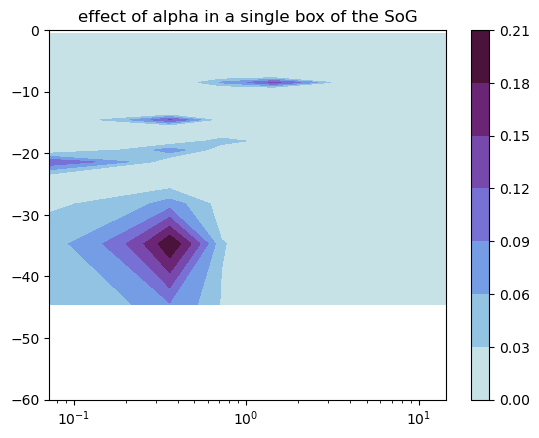

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

conc_dep = []
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    #conc = artificial_hr(conc,3,mask)
    conc = np.where(masktt,conc,np.nan)
    conc_dep.append(conc[:,150,80])#np.nanmean(np.nanmean(conc,axis=2),axis=1))
X,Y =np.meshgrid(list(alphs.values()) ,-mask.gdept_0[0,:,0,0])
plt.contourf(3600/X,Y,np.array(conc_dep).T,cmap=cm,vmin=0)
plt.xticks(3600/np.array(list(alphs.values())))
plt.colorbar()
plt.ylim(-60,0)
plt.xscale("log")
plt.title('effect of alpha in a single box of the SoG')

/tmp/ipykernel_2425872/859545473.py:8: RuntimeWarning: Mean of empty slice
  conc_dep.append(np.nanmean(np.nanmean(conc[:,150:152,80:82],axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))


Text(0.5, 1.0, 'effect of alpha average over a 2x2 area')

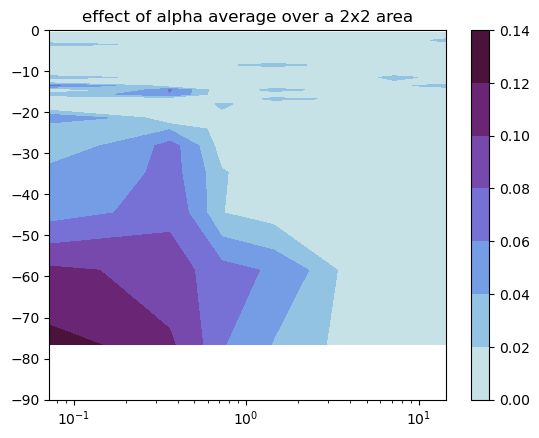

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

conc_dep = []
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    #conc = artificial_hr(conc,3,mask)
    conc = np.where(masktt,conc,np.nan)
    conc_dep.append(np.nanmean(np.nanmean(conc[:,150:152,80:82],axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))
X,Y =np.meshgrid(list(alphs.values()) ,-mask.gdept_0[0,:,0,0])
plt.contourf(3600/X,Y,np.array(conc_dep).T,cmap=cm,vmin=0)
plt.xticks(3600/np.array(list(alphs.values())))
plt.colorbar()
plt.ylim(-90,0)
plt.xscale("log")
plt.title('effect of alpha average over a 2x2 area')

/tmp/ipykernel_2425872/3366280163.py:8: RuntimeWarning: Mean of empty slice
  conc_dep.append(np.nanmean(np.nanmean(conc[:,150:153,80:83],axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))


Text(0.5, 1.0, 'effect of alpha average over a 3x3 area')

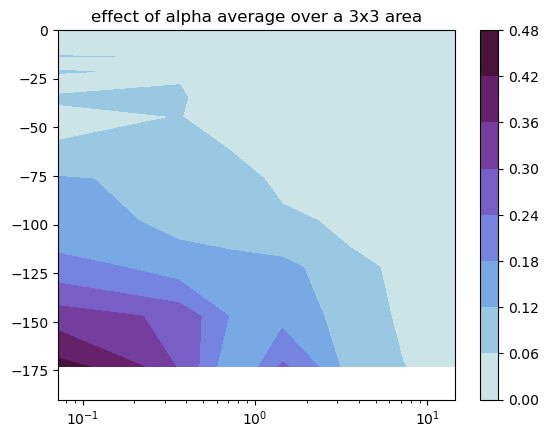

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

conc_dep = []
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    #conc = artificial_hr(conc,3,mask)
    conc = np.where(masktt,conc,np.nan)
    conc_dep.append(np.nanmean(np.nanmean(conc[:,150:153,80:83],axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))
X,Y =np.meshgrid(list(alphs.values()) ,-mask.gdept_0[0,:,0,0])
plt.contourf(3600/X,Y,np.array(conc_dep).T,cmap=cm,vmin=0)
plt.xticks(3600/np.array(list(alphs.values())))
plt.colorbar()
plt.ylim(-190,0)
plt.xscale("log")
plt.title('effect of alpha average over a 3x3 area')

/tmp/ipykernel_2425872/3696420295.py:8: RuntimeWarning: Mean of empty slice
  conc_dep.append(np.nanmean(np.nanmean(conc[:,150:166,80:88],axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))


Text(0.5, 1.0, 'effect of alpha average over a 16x8 area')

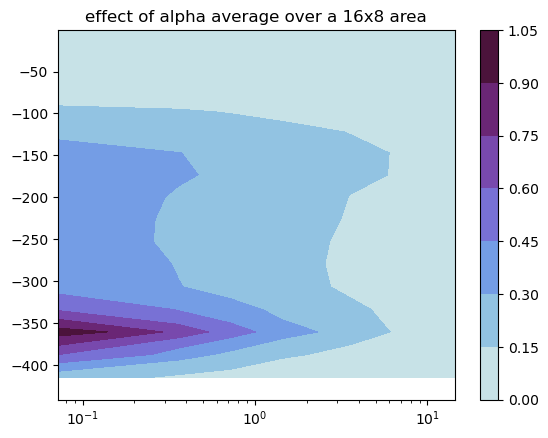

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

conc_dep = []
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    #conc = artificial_hr(conc,3,mask)
    conc = np.where(masktt,conc,np.nan)
    conc_dep.append(np.nanmean(np.nanmean(conc[:,150:166,80:88],axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))
X,Y =np.meshgrid(list(alphs.values()) ,-mask.gdept_0[0,:,0,0])
plt.contourf(3600/X,Y,np.array(conc_dep).T,cmap=cm,vmin=0)
plt.xticks(3600/np.array(list(alphs.values())))
plt.colorbar()
#plt.ylim(-200,0)
plt.xscale("log")
plt.title('effect of alpha average over a 16x8 area')

In [ ]:
maskbathy = np.where(masktt[0,:,:],mask.mbathy[0,::3,::3],np.nan)-1
maskbathy[np.isnan(maskbathy)]=0

/tmp/ipykernel_2425872/1719978465.py:10: RuntimeWarning: Mean of empty slice
  conc_dep.append(np.nanmean(np.nanmean(conc,axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))


Text(0.5, 1.0, 'effect of alpha average without last depth')

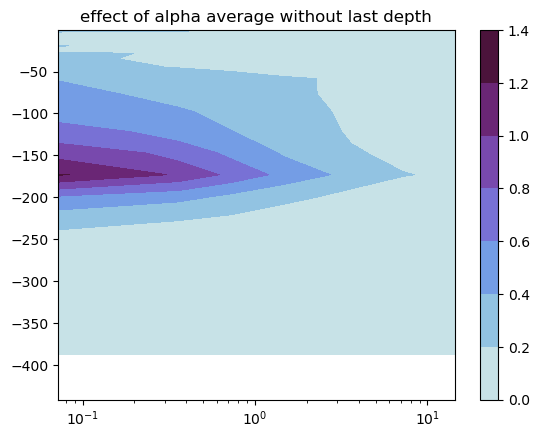

In [ ]:
concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

conc_dep = []
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    conc = np.where(masktt,conc,np.nan)
    for i in range(300):
        for j in range(133):
            conc[int(maskbathy[i,j]):,i,j]=np.nan
    conc_dep.append(np.nanmean(np.nanmean(conc,axis=2),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))
X,Y =np.meshgrid(list(alphs.values()) ,-mask.gdept_0[0,:,0,0])
plt.contourf(3600/X,Y,np.array(conc_dep).T,cmap=cm,vmin=0)
plt.xticks(3600/np.array(list(alphs.values())))
plt.colorbar()
#plt.ylim(-200,0)
plt.xscale("log")
plt.title('effect of alpha average without last depth')

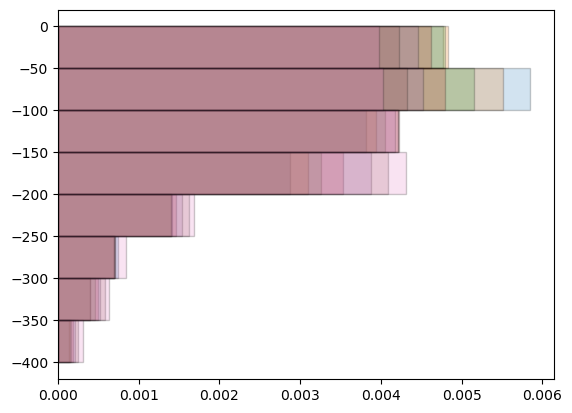

In [ ]:
# concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}
# for alpha in runs:
#     ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.status==1]
#     times= np.max(DS.time)
#     DS = DS[DS.time == times]
#     plt.hist(-DS.z, bins=[-400,-350,-300,-250,-200,-150,-100,-50,0], orientation='horizontal', edgecolor='black',alpha=0.2,density=True)


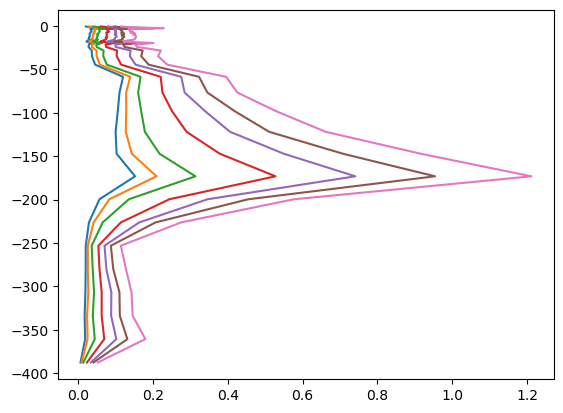

In [ ]:
plt.plot(np.array(conc_dep).T,-mask.gdept_0[0,:,0,0],label=list(alphs.values()))

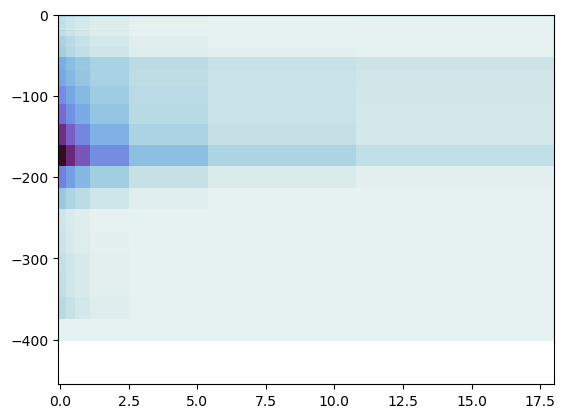

In [ ]:
aa = plt.pcolormesh(3600/X,Y,np.array(conc_dep).T,cmap=cm,vmin=0.05)

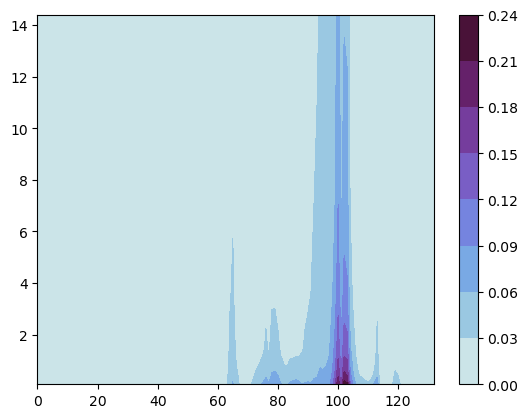

In [ ]:
conc_dep = []
for alp in alphs:
    conc = np.load(path_runs+concs[alp][0])/concs[alp][1]
    conc_dep.append(np.mean(np.mean(conc,axis=0),axis=0))
X,Y =np.meshgrid(list(alphs.values()) ,np.arange(133))
plt.contourf(Y,3600/X,np.array(conc_dep).T,cmap=cm)
plt.colorbar()

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth.
    
    Parameters:
        lat1, lon1: Latitude and longitude of point 1 in decimal degrees.
        lat2, lon2: Latitude and longitude of point 2 in decimal degrees.
    
    Returns:
        Distance in kilometers.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    r = 6371000  # Radius of Earth in kilometers
    return r * c


lat1, lon1 = yedges[0], xedges[0]  # Berlin
lat2, lon2 = yedges[1], xedges[1]   # Paris

distance = haversine(lat1, lon1, lat2, lon2)
print(f"Distance: {distance:.2f} km")

Distance: 8.85 km


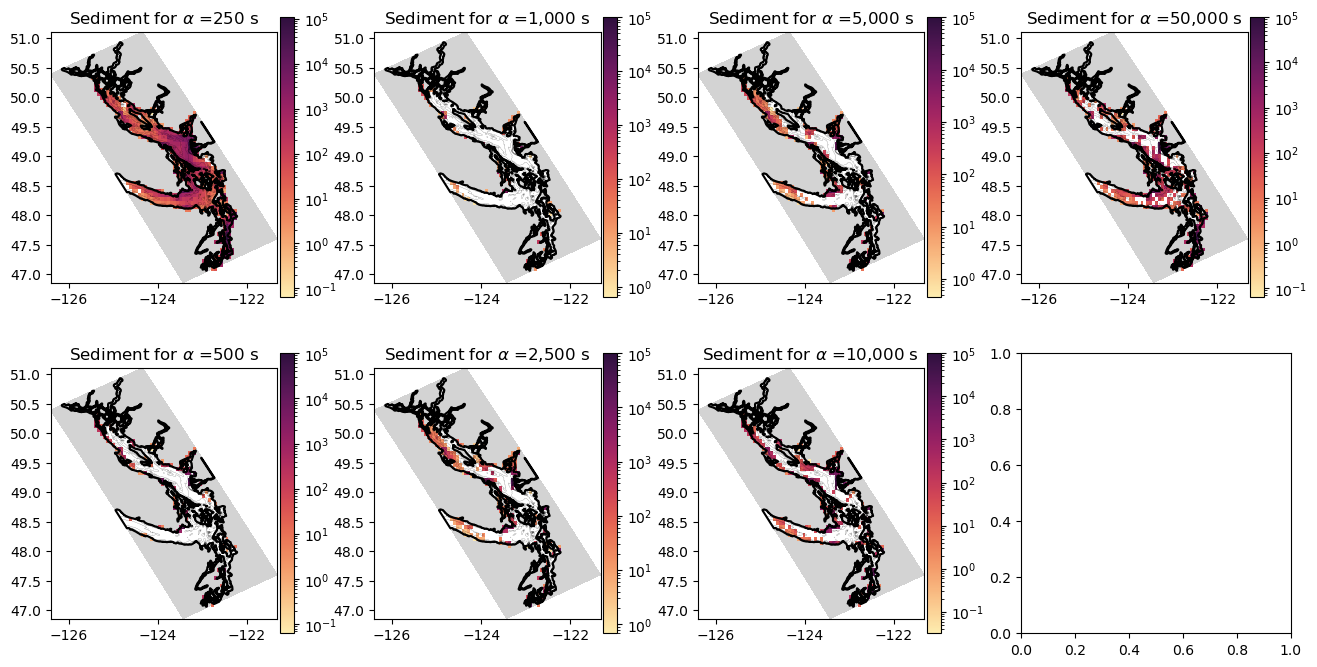

In [ ]:
from matplotlib import pyplot as plt,colors
import cmocean
cm = cmocean.cm.matter

fig, ax = plt.subplots(2,4,figsize=(16, 8))
for i,alpha in enumerate(alphs):
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]

    if i == 0:
        ax[i%2,i//2].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
        ax[i%2,i//2].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
        ax[i%2,i//2].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
        h0, xedges, yedges, image = ax[i%2,i//2].hist2d(DS.lon,DS.lat,50,weights=DS.status*0.127/(concs[alpha][1]*3),cmap =cm,norm=colors.LogNorm())
        vmax = np.max(h0[0])
        ax[i%2,i//2].set_xlim(np.min(mask.nav_lon),np.max(mask.nav_lon))
        ax[i%2,i//2].set_ylim(np.min(mask.nav_lat),np.max(mask.nav_lat))
    else:
        h, xedges0, yedges0, image = ax[i%2,i//2].hist2d(DS.lon,DS.lat,50,cmap =cm,norm=colors.LogNorm())
        ax[i%2,i//2].clear()
        ax[i%2,i//2].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
        ax[i%2,i//2].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
        ax[i%2,i//2].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
        image=ax[i%2,i//2].pcolormesh(xedges, yedges, (h0-h).T,norm=colors.LogNorm(vmax= 1e5),cmap=cm)
    plt.colorbar(image,ax=ax[i%2,i//2],pad=0.01)
    ax[i%2,i//2].set_aspect(1/np.sin(np.deg2rad(49)))
    ax[i%2,i//2].set_title(r'Sediment for $\alpha$ =' +f'{alpha}')

In [ ]:
x = np.array(list(alphs.values()))
x =x/3600
delta_alpha=np.array([xi-x[i-1] for i,xi in enumerate(x)][1:])
delta_count=np.array([xi-count[i-1] for i,xi in enumerate(count)][1:])
plt.plot(delta_alpha ,delta_count/delta_alpha,'.')
xs = delta_alpha
ys = delta_count/delta_alpha


NameError: name 'np' is not defined

In [ ]:
means = []
vol = mask.e1t*mask.e2t
vol = vol.sum()
for alpha in runs:
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
    means.append(np.mean(conc[-20:]))

In [ ]:
means_month = []
vol = mask.e1t*mask.e2t
vol = vol.sum()
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs['5,000 s'][1])
    means_month.append(np.mean(conc[-20:]))

KeyboardInterrupt: 

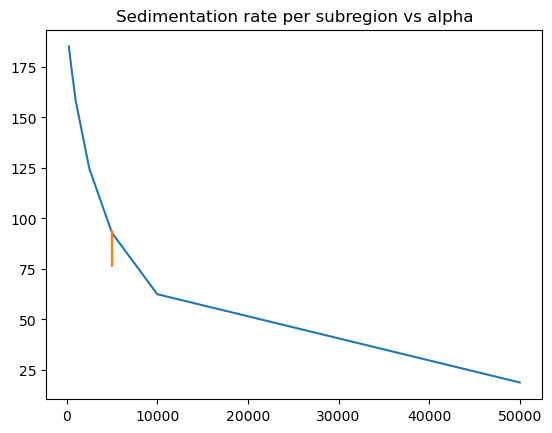

In [ ]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}
plt.plot(list(alphs.values()),means)
plt.title('Sedimentation rate per subregion vs alpha')
plt.plot([5000,5000,5000,5000,5000,5000],means_month)

In [ ]:
meansc = []
vol = mask.volume.sum()
for alpha in runs:
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==1]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
    meansc.append(np.mean(conc[-20:]))

In [ ]:
meansc_month = []
vol = mask.volume.sum()
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==1]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs['5,000 s'][1])
    meansc_month.append(np.mean(conc[-20:]))

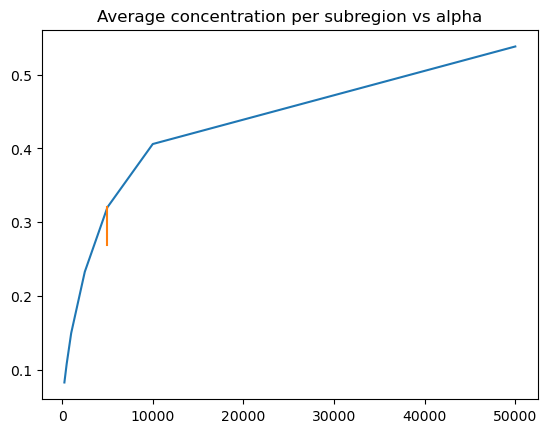

In [ ]:
plt.plot(list(alphs.values()),meansc)
plt.title('Average concentration per subregion vs alpha')
plt.plot([5000,5000,5000,5000,5000,5000],meansc_month)

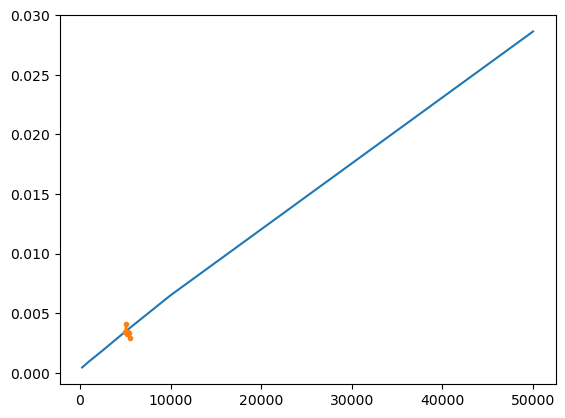

In [ ]:
plt.plot(list(alphs.values()),np.array(meansc)/np.array(means))
plt.plot([5000,5100,5200,5300,5400,5500],np.array(meansc_month)/np.array(means_month),'.-')
